In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from catboost import CatBoostClassifier

from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import f1_score

from interpret.glassbox import ExplainableBoostingClassifier
from interpret.data import ClassHistogram
from interpret import show

In [26]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [27]:
df = pd.read_csv('ar_properties.csv')
df.head(5)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,wdQ5hWhv8P14T7Sh9g4QCg==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-32.716652,-68.642692,Argentina,Mendoza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,350.0,NaN,NaN,NaN,Excelentes Lotes Sobre Ruta 34,Corredor Responsable: VICTOR E. MONTIVERO - C....,Lote,Venta
1,nnMBYZ4RMRY+vm753EtA+g==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-24.797723,-65.467514,Argentina,Salta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1541.0,1541.0,NaN,NaN,Mensual,TERRENO + VENTA + JARDINES DE SAN LORENZO +150...,Corredor Responsable: Pablo Castañeda - C.U.C....,Lote,Venta
2,+dnVA1K6JxzL1zAjOEQ1pA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919373,-58.020591,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,NaN,NaN,NaN,NaN,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta
3,dLHXKN5/sRZpm9Yk0yI2nA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919455,-58.024807,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,NaN,NaN,NaN,NaN,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta
4,wtw/k887EPipd37UYHKb1Q==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-34.364924,-58.783143,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,Belén de Escobar,NaN,NaN,NaN,NaN,NaN,18164.0,18164.0,NaN,NaN,Mensual,PANAMERICANA 47300,Nave principal 66 x 90 m: 6005 m2 cubiertos...,Otro,Venta


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,wdQ5hWhv8P14T7Sh9g4QCg==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-32.716652,-68.642692,Argentina,Mendoza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,350.0,NaN,NaN,NaN,Excelentes Lotes Sobre Ruta 34,Corredor Responsable: VICTOR E. MONTIVERO - C....,Lote,Venta
1,nnMBYZ4RMRY+vm753EtA+g==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-24.797723,-65.467514,Argentina,Salta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1541.0,1541.0,NaN,NaN,Mensual,TERRENO + VENTA + JARDINES DE SAN LORENZO +150...,Corredor Responsable: Pablo Castañeda - C.U.C....,Lote,Venta
2,+dnVA1K6JxzL1zAjOEQ1pA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919373,-58.020591,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,NaN,NaN,NaN,NaN,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta
3,dLHXKN5/sRZpm9Yk0yI2nA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919455,-58.024807,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,NaN,NaN,NaN,NaN,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta
4,wtw/k887EPipd37UYHKb1Q==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-34.364924,-58.783143,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,Belén de Escobar,NaN,NaN,NaN,NaN,NaN,18164.0,18164.0,NaN,NaN,Mensual,PANAMERICANA 47300,Nave principal 66 x 90 m: 6005 m2 cubiertos...,Otro,Venta


In [28]:
print(f"Dataset Shape: {df.shape}")
 
summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
summary = summary.reset_index()
summary['Name'] = summary['index']
summary['Missing'] = df.isnull().sum().values
summary['PercMissing'] = df.isnull().sum().values / df.isnull().count().values
summary['Uniques'] = df.nunique().values
summary['Data type'] = df.dtypes.values
 
print('**Variable Description of  data:**')
summary

Dataset Shape: (1000000, 25)
Dataset Shape: (1000000, 25)
**Variable Description of  data:**
**Variable Description of  data:**


,index,dtypes,Name,Missing,PercMissing,Uniques,Data type
0,id,object,id,0,0.000000,1000000,object
1,ad_type,object,ad_type,0,0.000000,1,object
2,start_date,object,start_date,0,0.000000,318,object
3,end_date,object,end_date,0,0.000000,450,object
4,created_on,object,created_on,0,0.000000,318,object
5,lat,float64,lat,150811,0.150811,322093,float64
6,lon,float64,lon,151745,0.151745,323811,float64
7,l1,object,l1,0,0.000000,4,object
8,l2,object,l2,0,0.000000,43,object
9,l3,object,l3,53327,0.053327,1301,object


,index,dtypes,Name,Missing,PercMissing,Uniques,Data type
0,id,object,id,0,0.000000,1000000,object
1,ad_type,object,ad_type,0,0.000000,1,object
2,start_date,object,start_date,0,0.000000,318,object
3,end_date,object,end_date,0,0.000000,450,object
4,created_on,object,created_on,0,0.000000,318,object
5,lat,float64,lat,150811,0.150811,322093,float64
6,lon,float64,lon,151745,0.151745,323811,float64
7,l1,object,l1,0,0.000000,4,object
8,l2,object,l2,0,0.000000,43,object
9,l3,object,l3,53327,0.053327,1301,object


In [29]:
cut = 1e6
df["high_price"] = df["price"].astype('float') >= cut

#plt.hist(df["high_price"], color = 'blue', bins = 80, density= True)
#plt.axvline(x=cut)
#plt.subplots_adjust(left=-1, bottom=-1, right=0.05, top=0.1, wspace=0.25, hspace=0.5)

In [30]:
target_column = ["high_price"]
 
numerical_column = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
 
categorical_columns = ['l1', 'l2', 'l3', 'currency', 'price_period', 'property_type', 'operation_type']
 
for l in numerical_column: df[l] = df[l].astype('float')
for l in categorical_columns: df[l] = df[l].fillna(-1).astype('category')

df = df[target_column + numerical_column + categorical_columns]

df = df.dropna(subset=["high_price"])
df["high_price"] = df["high_price"].astype('int')


In [31]:
#Train/test split
 
X = df.drop('high_price', axis=1)
y = df['high_price']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
n_train=y.size
n_test=y_test.size
 
n,p=X.shape
n_classes= np.unique(y).size
 
#matrice des probas
lb = LabelBinarizer().fit(y)
Y_train = lb.transform(y_train) 
Y_test = lb.transform(y_test) 
 
print("Shape of train X,y,Y: ",X_train.shape, y_train.shape, Y_train.shape)
print("Shape of test X,y,Y: ",X_test.shape, y_test.shape, Y_test.shape)
print("Number of classes: ", n_classes)

Shape of train X,y,Y:  (800000, 14) (800000,) (800000, 1)
Shape of test X,y,Y:  (200000, 14) (200000,) (200000, 1)
Number of classes:  2
Shape of train X,y,Y:  (800000, 14) (800000,) (800000, 1)
Shape of test X,y,Y:  (200000, 14) (200000,) (200000, 1)
Number of classes:  2


In [32]:
#Verif ratio:
 
Balance_train = np.unique(y_train, return_counts=True)
Prop_train = Balance_train[1]/np.sum(Balance_train[1])
Ratio_train = Balance_train[1]/Balance_train[1][[np.argmax(Balance_train[1])]]
 
Balance_test = np.unique(y_test, return_counts=True)
Prop_test = Balance_test[1]/np.sum(Balance_test[1])
Ratio_test = Balance_test[1]/Balance_test[1][[np.argmax(Balance_train[1])]]
 
print("Balance_train:", Balance_train)
print("Balance_test:", Balance_test)
print("-"*80)
print("Prop_train:", Prop_train)
print("Prop_test:", Prop_test)
print("-"*80)
print("Ratio_train:", Ratio_train)
print("Ratio_test:", Ratio_test)

Balance_train: (array([0, 1]), array([769791,  30209], dtype=int64))
Balance_test: (array([0, 1]), array([192437,   7563], dtype=int64))
--------------------------------------------------------------------------------
Prop_train: [0.96223875 0.03776125]
Prop_test: [0.962185 0.037815]
--------------------------------------------------------------------------------
Ratio_train: [1.         0.03924312]
Ratio_test: [1.         0.03930117]
Balance_train: (array([0, 1]), array([769791,  30209], dtype=int64))
Balance_test: (array([0, 1]), array([192437,   7563], dtype=int64))
--------------------------------------------------------------------------------
Prop_train: [0.96223875 0.03776125]
Prop_test: [0.962185 0.037815]
--------------------------------------------------------------------------------
Ratio_train: [1.         0.03924312]
Ratio_test: [1.         0.03930117]


In [33]:
#Train model
clf_catboost = CatBoostClassifier(cat_features = sorted([X.columns.get_loc(col) for col in categorical_columns]))
clf_catboost = clf_catboost.fit(X_train, y_train, verbose = 100, eval_set = (X_test, y_test))

Learning rate set to 0.165186
Learning rate set to 0.165186
0:	learn: 0.3924037	test: 0.3930913	best: 0.3930913 (0)	total: 2.08s	remaining: 34m 40s
0:	learn: 0.3924037	test: 0.3930913	best: 0.3930913 (0)	total: 2.08s	remaining: 34m 40s
100:	learn: 0.0508200	test: 0.0520485	best: 0.0520485 (100)	total: 2m 17s	remaining: 20m 24s
100:	learn: 0.0508200	test: 0.0520485	best: 0.0520485 (100)	total: 2m 17s	remaining: 20m 24s
200:	learn: 0.0467629	test: 0.0485588	best: 0.0485588 (200)	total: 3m 48s	remaining: 15m 10s
200:	learn: 0.0467629	test: 0.0485588	best: 0.0485588 (200)	total: 3m 48s	remaining: 15m 10s
300:	learn: 0.0446864	test: 0.0469058	best: 0.0469058 (300)	total: 5m 21s	remaining: 12m 26s
300:	learn: 0.0446864	test: 0.0469058	best: 0.0469058 (300)	total: 5m 21s	remaining: 12m 26s
400:	learn: 0.0432507	test: 0.0459025	best: 0.0459025 (400)	total: 6m 57s	remaining: 10m 23s
400:	learn: 0.0432507	test: 0.0459025	best: 0.0459025 (400)	total: 6m 57s	remaining: 10m 23s
500:	learn: 0.041967

In [34]:
#Result model
Y_hat_train = clf_catboost.predict_proba(X_train)
Y_hat_test = clf_catboost.predict_proba(X_test)

In [35]:
#Loss
print("Train loss: ", log_loss(Y_train, Y_hat_train))
print("Test loss: ", log_loss(Y_test, Y_hat_test))
 
print("Test loss (random): ", log_loss(Y_test, np.ones((n_test,2))*0.5))

Train loss:  0.03771845439178584
Test loss:  0.042829537521032315
Test loss (random):  0.6931471805599453
Train loss:  0.03771845439178584
Test loss:  0.042829537521032315
Test loss (random):  0.6931471805599453


AUC PR (EBM):  0.8711454813857971
AUC PR (Random):  0.037815

AUC ROC (EBM):  0.9851533577070827
AUC ROC (Random):  0.5
AUC PR (EBM):  0.8711454813857971
AUC PR (Random):  0.037815

AUC ROC (EBM):  0.9851533577070827
AUC ROC (Random):  0.5


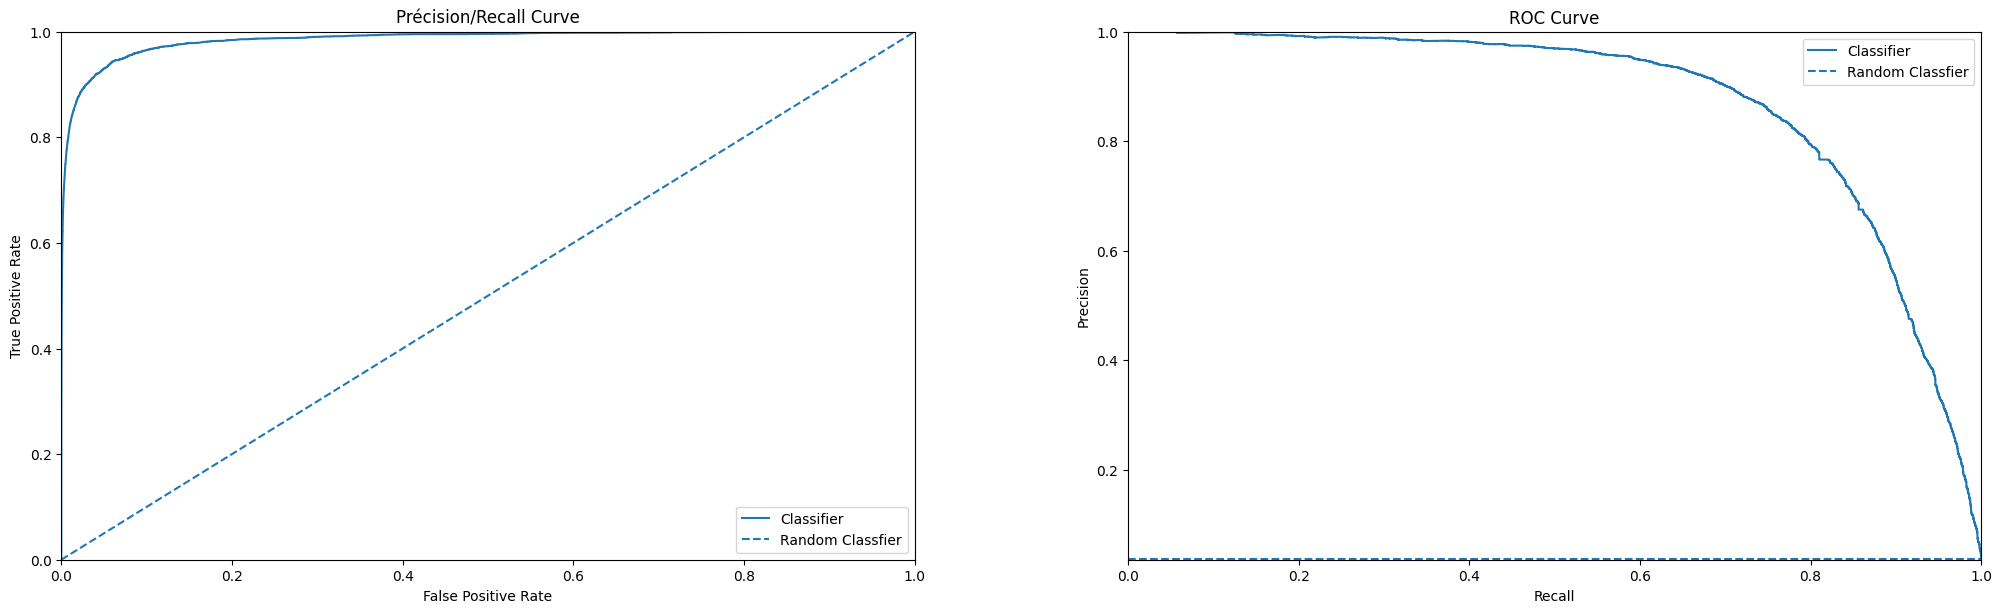

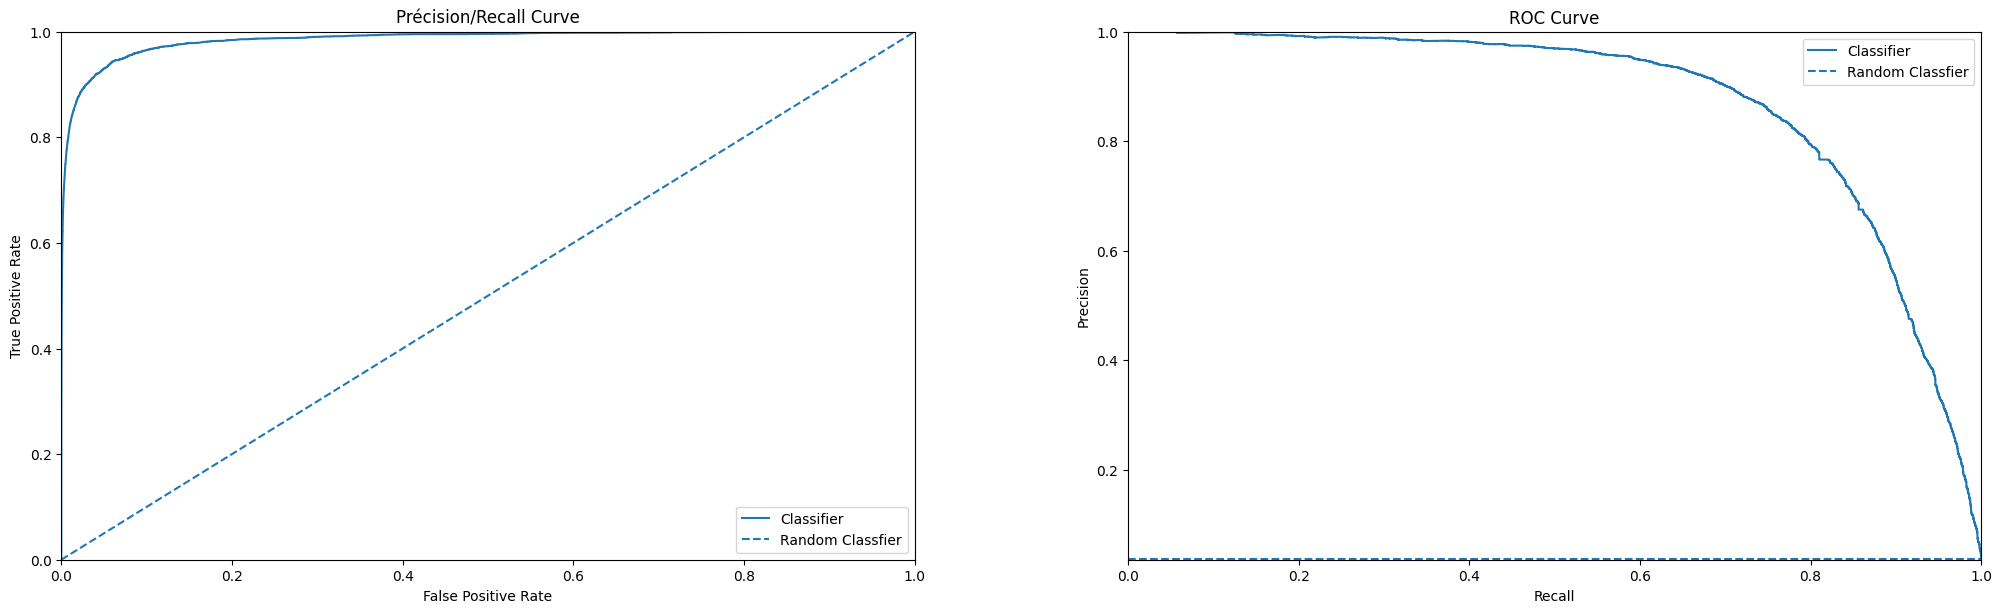

In [36]:
precision, recall, thresholds = precision_recall_curve(y_test, Y_hat_test[:,1])
fpr, tpr, thresholds = roc_curve(y_test, Y_hat_test[:,1])
 
fig, (ax1, ax0) = plt.subplots(nrows=1,ncols=2)
 
display = PrecisionRecallDisplay(precision= precision, recall= recall)
display.plot(ax = ax0, label = "Classifier") 
ax0.axhline(y=Balance_test[1][1]/(Balance_test[1][0] + Balance_test[1][1]), linestyle = "--", label = 'Random Classfier')
ax0.legend()
ax0.set_xlim(0,1)
ax0.set_ylim(Balance_test[1][1]/(Balance_test[1][0] + Balance_test[1][1])*0.95,1)
ax0.set_title("ROC Curve")
 
display = RocCurveDisplay(fpr= fpr, tpr= tpr)
display.plot(ax = ax1, label = "Classifier")
ax1.axline((0, 0), slope=1, linestyle = "--", label = 'Random Classfier')
ax1.legend()
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_title("Précision/Recall Curve")
 
plt.subplots_adjust(left=-1, bottom=-1, right=2, top=0.1, wspace=0.25, hspace=0.5)
 
print("AUC PR (EBM): ", auc(recall, precision))
print("AUC PR (Random): ", Balance_test[1][1]/(Balance_test[1][0] + Balance_test[1][1]))
print("")
print("AUC ROC (EBM): ", auc(fpr, tpr))
print("AUC ROC (Random): ", 0.5)

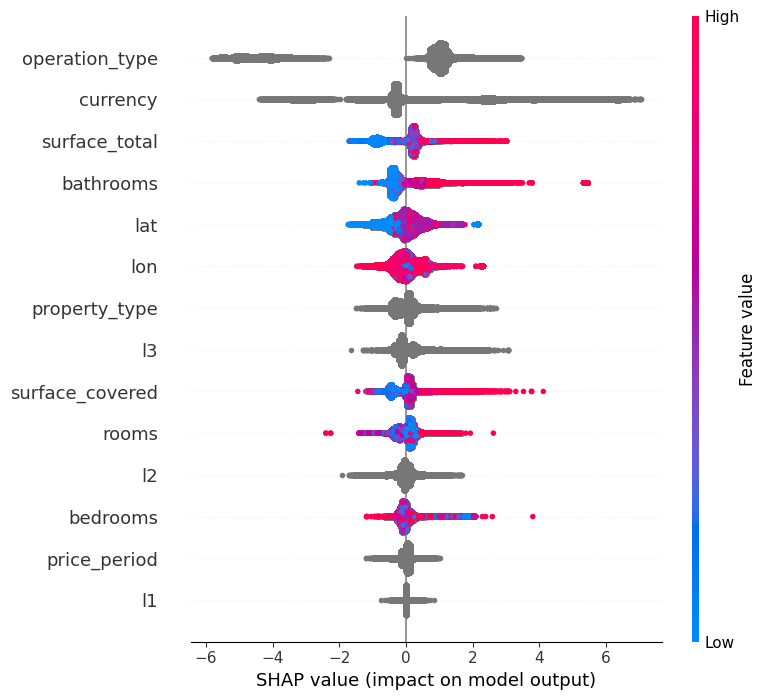

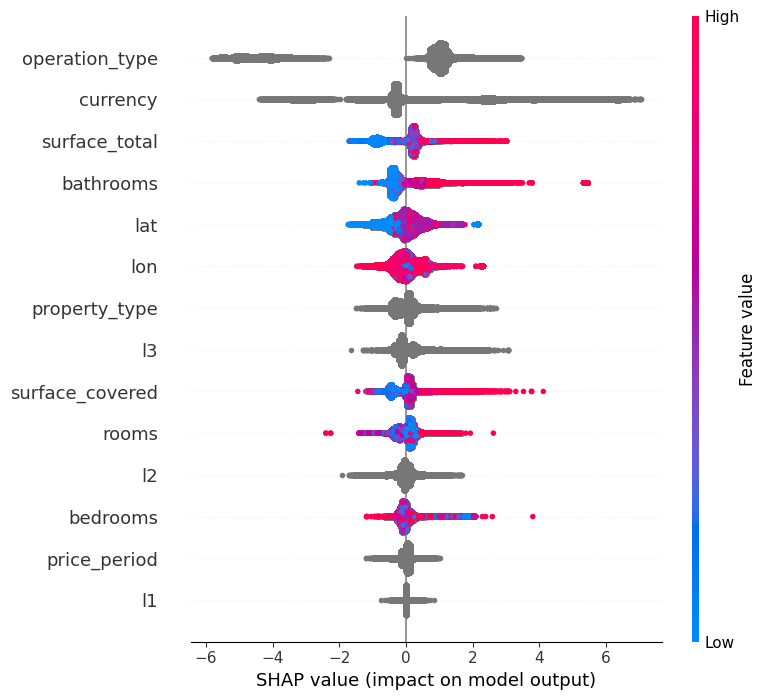

In [37]:
explainer = sp.TreeExplainer(clf_catboost)
shap_values = explainer.shap_values(X_train)
 
sp.summary_plot(shap_values, X_train)

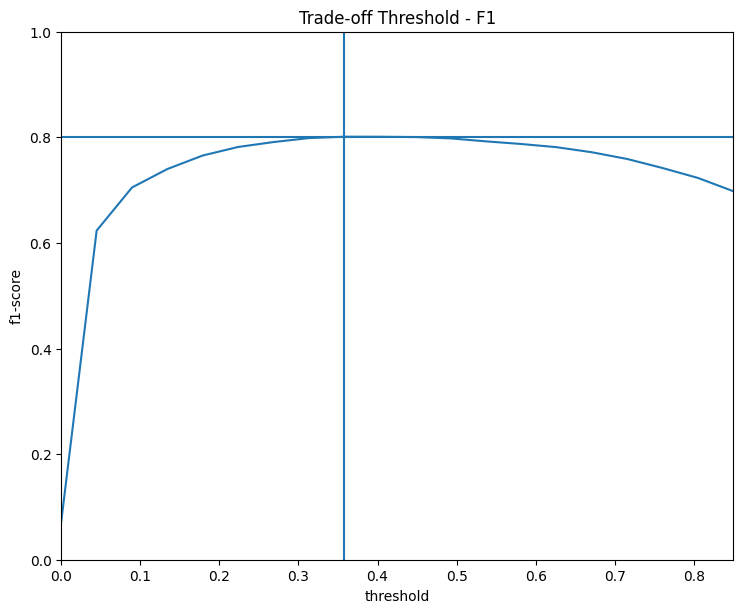

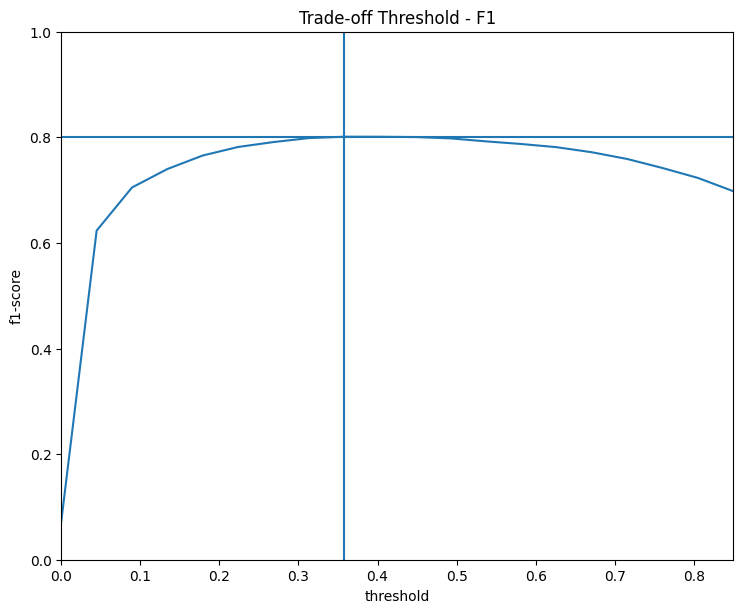

In [38]:
#Should be CV
p_max = 0.85
threshold = np.linspace(0, p_max, 20)
 
f1 = np.zeros(threshold.size) 
for i in range(threshold.size):
    y_hat_test_ = Y_hat_test[:,1] >= threshold[i]
    f1[i] = f1_score(y_test, y_hat_test_)
 
argmax = np.argmax(f1)
p_star = threshold[argmax]
 
plt.plot(threshold,f1)
plt.title("Trade-off Threshold - F1")
plt.xlabel("threshold")
plt.ylabel("f1-score")
plt.xlim(0,p_max)
plt.ylim(0,1)
plt.axvline(p_star)
plt.axhline(f1[argmax])
 
plt.subplots_adjust(left=-1, bottom=-1, right=0.05, top=0.1, wspace=0.25, hspace=0.5)

In [39]:
threshold = p_star
y_hat_train = Y_hat_train[:,1] >= threshold
y_hat_test = Y_hat_test[:,1] >= threshold

In [40]:
Balance_hat_test = np.unique(y_hat_test, return_counts=True)
Balance_test = np.unique(y_test, return_counts=True)
 
print("Taille échantillon:", y_test.size,"\n\n")
print("     y_pred    y_true","\n")
print("0:  ", Balance_hat_test[1][0],"  ", Balance_test[1][0])
print("1:    ", Balance_hat_test[1][1],"    ", Balance_test[1][1])

Taille échantillon: 200000 


     y_pred    y_true 

0:   192802    192437
1:     7198      7563
Taille échantillon: 200000 


     y_pred    y_true 

0:   192802    192437
1:     7198      7563


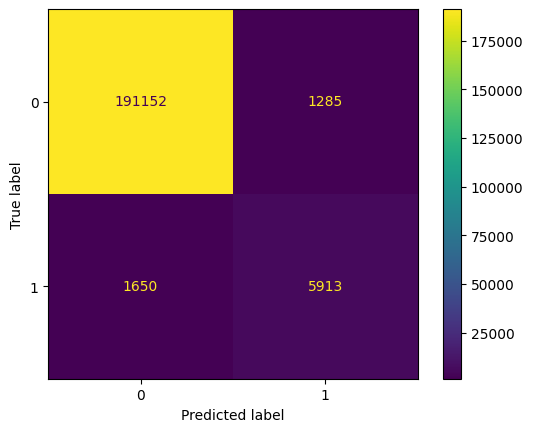

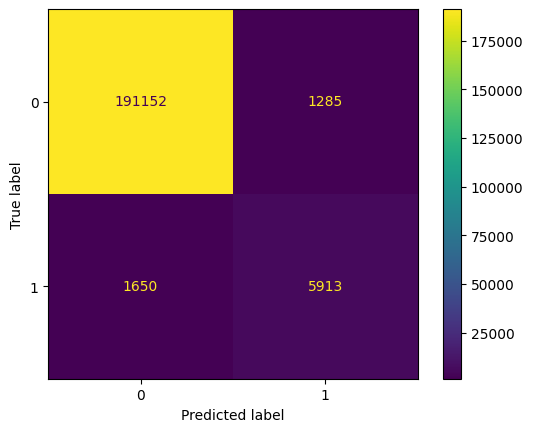

In [41]:
fig = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat_test), display_labels = (["0", "1"]) )
fig.plot()

In [42]:
print(classification_report(y_test, y_hat_test, target_names = ["0", "1"]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    192437
           1       0.82      0.78      0.80      7563

    accuracy                           0.99    200000
   macro avg       0.91      0.89      0.90    200000
weighted avg       0.99      0.99      0.99    200000

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    192437
           1       0.82      0.78      0.80      7563

    accuracy                           0.99    200000
   macro avg       0.91      0.89      0.90    200000
weighted avg       0.99      0.99      0.99    200000



In [43]:
clf_ebm = ExplainableBoostingClassifier()
clf_ebm.fit(X_train, y_train)

C:\Users\Vfarc\anaconda3\envs\Test\Lib\site-packages\interpret\glassbox\_ebm\_ebm.py:669: UserWarning:

Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]

C:\Users\Vfarc\anaconda3\envs\Test\Lib\site-packages\interpret\glassbox\_ebm\_ebm.py:669: UserWarning:

Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]



ExplainableBoostingClassifier()

ExplainableBoostingClassifier()

In [44]:
Y_hat_train = clf_ebm.predict_proba(X_train)
Y_hat_test = clf_ebm.predict_proba(X_test)

In [45]:
#Loss
print("Train loss: ", log_loss(Y_train, Y_hat_train))
print("Test loss: ", log_loss(Y_test, Y_hat_test))
 
print("Test loss (random): ", log_loss(Y_test,np.ones((n_test,2))*0.5))

Train loss:  0.06047456460657762
Test loss:  0.0618446050999342
Test loss (random):  0.6931471805599453
Train loss:  0.06047456460657762
Test loss:  0.0618446050999342
Test loss (random):  0.6931471805599453


AUC PR (EBM):  0.7560295345192751
AUC PR (Random):  0.037815

AUC ROC (EBM):  0.9681530708631193
AUC ROC (Random):  0.5
AUC PR (EBM):  0.7560295345192751
AUC PR (Random):  0.037815

AUC ROC (EBM):  0.9681530708631193
AUC ROC (Random):  0.5


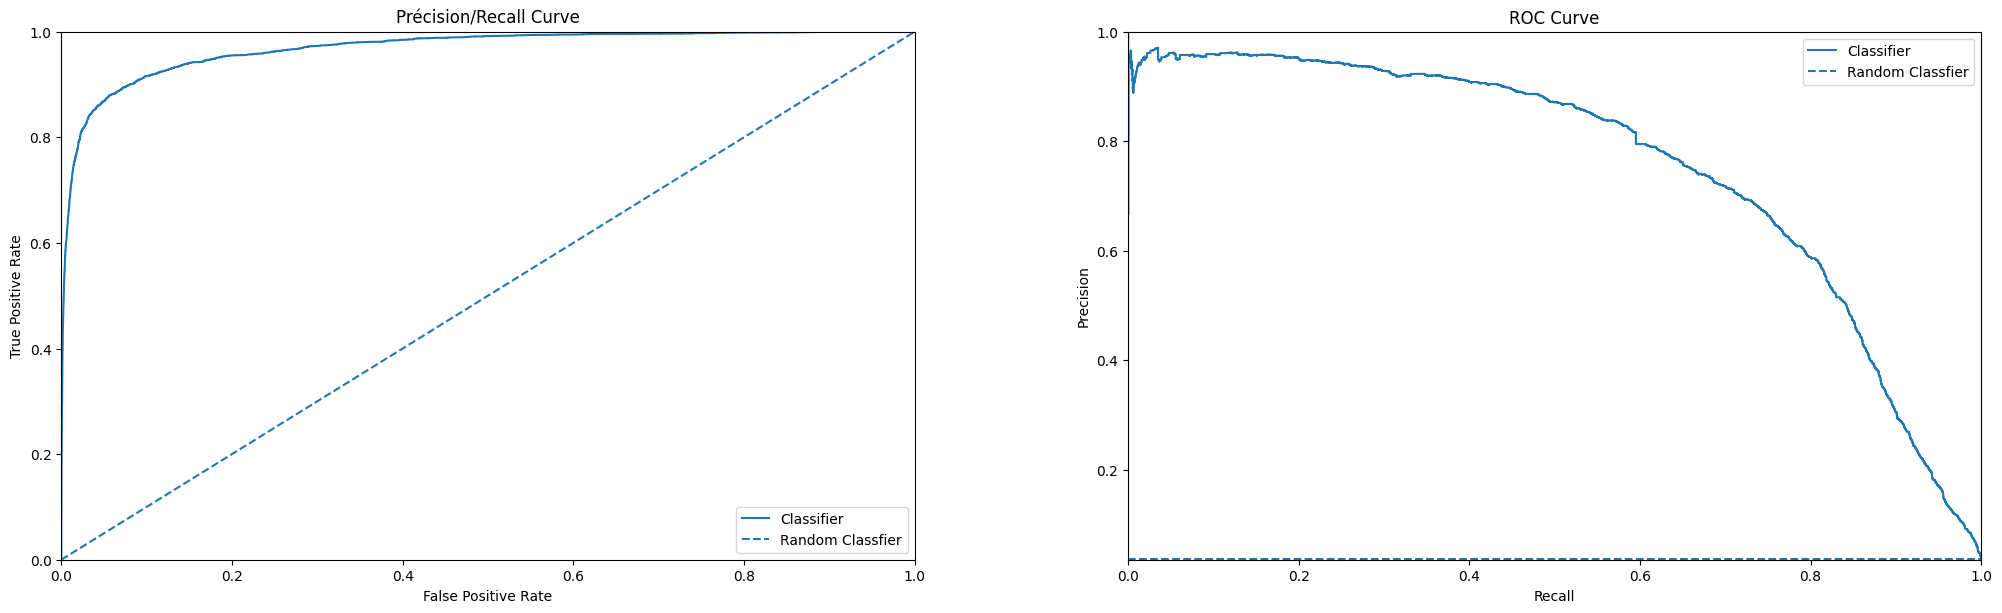

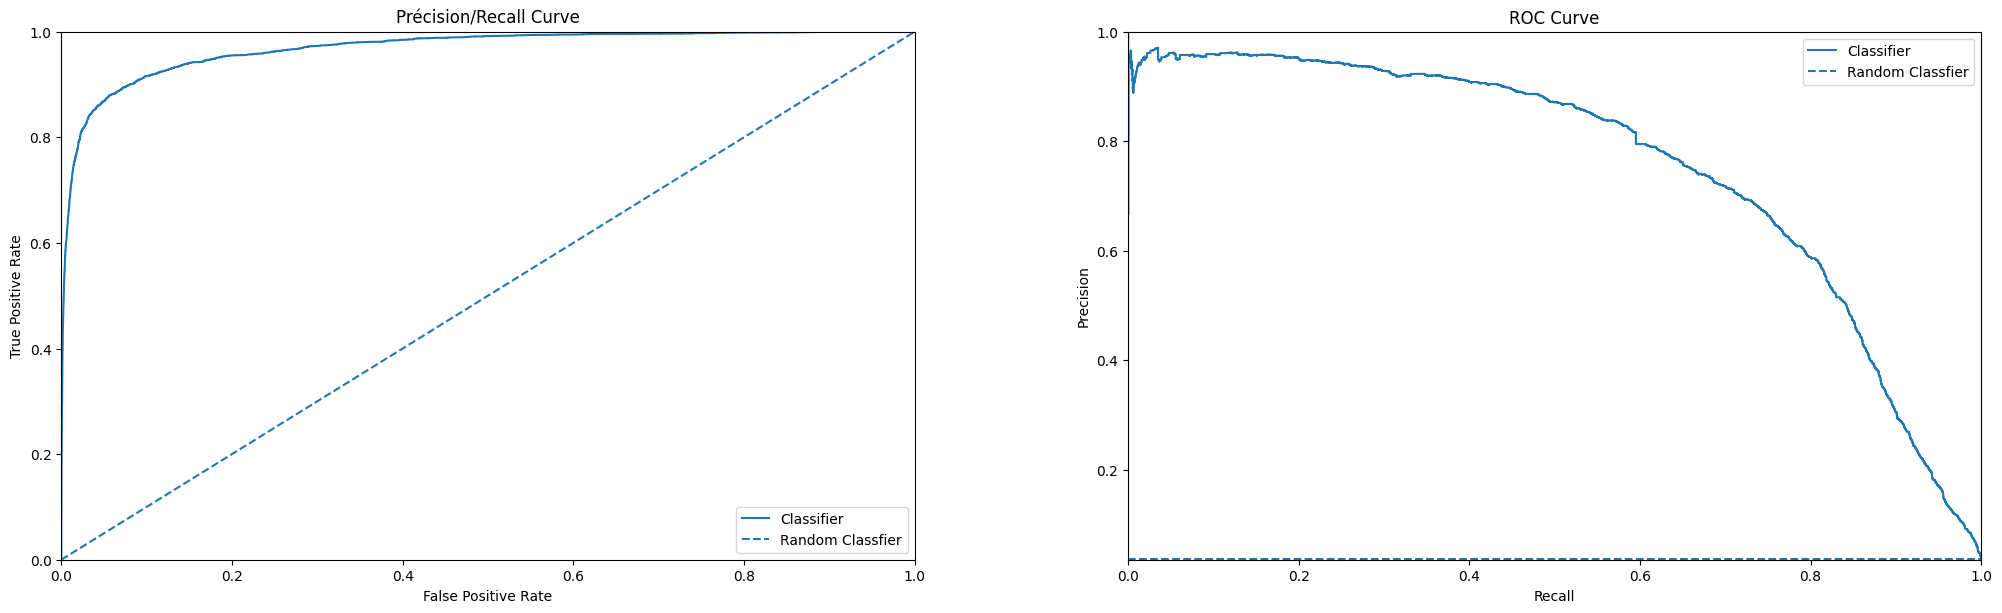

In [46]:
precision, recall, thresholds = precision_recall_curve(y_test, Y_hat_test[:,1])
fpr, tpr, thresholds = roc_curve(y_test, Y_hat_test[:,1])
 
fig, (ax1, ax0) = plt.subplots(nrows=1,ncols=2)
 
display = PrecisionRecallDisplay(precision= precision, recall= recall)
display.plot(ax = ax0, label = "Classifier") 
ax0.axhline(y=Balance_test[1][1]/(Balance_test[1][0] + Balance_test[1][1]), linestyle = "--", label = 'Random Classfier')
ax0.legend()
ax0.set_xlim(0,1)
ax0.set_ylim(Balance_test[1][1]/(Balance_test[1][0] + Balance_test[1][1])*0.95,1)
ax0.set_title("ROC Curve")
 
display = RocCurveDisplay(fpr= fpr, tpr= tpr)
display.plot(ax = ax1, label = "Classifier")
ax1.axline((0, 0), slope=1, linestyle = "--", label = 'Random Classfier')
ax1.legend()
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_title("Précision/Recall Curve")
 
plt.subplots_adjust(left=-1, bottom=-1, right=2, top=0.1, wspace=0.25, hspace=0.5)
 
print("AUC PR (EBM): ", auc(recall, precision))
print("AUC PR (Random): ", Balance_test[1][1]/(Balance_test[1][0] + Balance_test[1][1]))
print("")
print("AUC ROC (EBM): ", auc(fpr, tpr))
print("AUC ROC (Random): ", 0.5)

In [47]:
clf_ebm_explain = clf_ebm.explain_global(name='EBM')

In [48]:
show(clf_ebm.explain_global(name='EBM'))

C:\Users\Vfarc\anaconda3\envs\Test\Lib\site-packages\interpret\visual\_udash.py:117: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Vfarc\anaconda3\envs\Test\Lib\site-packages\interpret\visual\_udash.py:117: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<!-- http://127.0.0.1:7961/1292572657104/ -->

<!-- http://127.0.0.1:7961/1292572657104/ -->